## Name : Purnanand Kulkarni

### EDA Retail ( Level - Beginner )
### Dataset Link : https://bit.ly/3i4rbWl

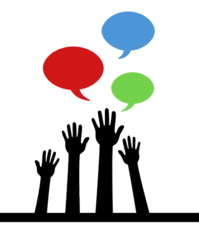

In [1]:
import urllib.request
from PIL import Image

urllib.request.urlretrieve("https://www.thesparksfoundationsingapore.org/images/logo_small.png",'logo.png')

Image.open("logo.png")

## The SPARKS FOUNDATION

# EDA Problem Statement
* Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'
* As a business manager, try to find out the weak areas where you can work to make more profit.
* What all business problems you can derive by exploring data ?

### 1. Import Data and Required libraries
#### 1.1 Importing Numpy, Pandas, Seaborn and Matplotlib

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1.2 Loading CSV file

In [3]:
df = pd.read_csv(r"SampleSuperstore.csv")

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### 2. Information about our data

#### 2.1 Feature Information
* **Ship Mode** : Which shipping mode was chosen for the orders.
* **Segment**   : Segment in which the person who ordered belongs.
* **Country**   : Country where it was ordered.
* **State**     : State where it was ordered.
* **Postal Code**: Postal code of the area where the order was given.
* **Region**: Region of the Country.
* **category**: Category under which the Product belongs.
* **Sub-Category**: Sub-Category of the category under which the product belongs.
* **Sales** : Number of Sales from that order.
* **Quantity**:Quantity purchased in that order.
* **Discount** : Discount given in that order.
* **Profit** : Profit received from that order.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**2.2 Numerical Feature Information**

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### 2.3 Dividing the data into Numeric and categorical data.

In [7]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_features.remove('Postal Code')
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Sales', 'Quantity', 'Discount', 'Profit']

We have 8 categorical features : ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']


#### 2.4  Average Sales, Quantity purchased, Discount given & Profit

In [8]:
for i in numeric_features:
    print(f"The Average {i} is {df[i].mean()}")

The Average Sales is 229.8580008304938
The Average Quantity is 3.789573744246548
The Average Discount is 0.15620272163298934
The Average Profit is 28.656896307784802


**2.5 Check Null values**

In [9]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**No Null Values**

# 3. Asking revelant questions about the data.

## 3.1 Which shipping mode does customer choose based on the products category and sum of the quantity ?

In [10]:
df_shipmode = df[['Ship Mode','Category','Quantity']].groupby(['Ship Mode','Category']).sum('Quantity')
df_shipmode

Quantity
Ship Mode      Category                 
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122

<AxesSubplot:title={'center':'Ship Mode VS Quantity'}, xlabel='Ship mode with category', ylabel='Ship mode with category'>

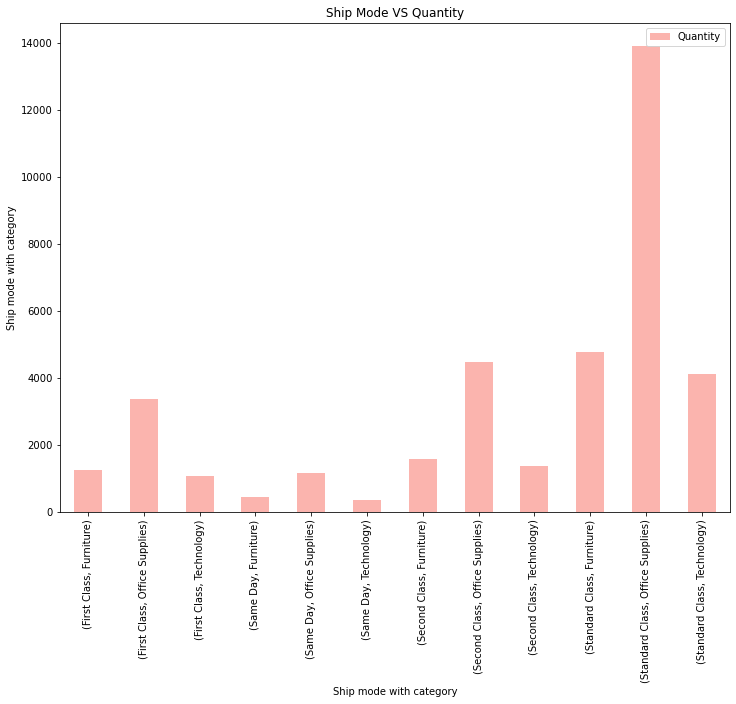

In [11]:
df_shipmode.plot(kind='bar', title='Ship Mode VS Quantity',
                 xlabel='Ship mode with category',
                 ylabel = 'Ship mode with category',
                 colormap='Pastel1',
                 figsize = (12,9))

### Conclusion : 
### Most of the customers prefer to choose Standard Mode for shipping while compared to other modes

## 3.2 What are the states with Maximum and Minimum Sales ?

In [28]:
#State VS Sales

state_sales_df = pd.pivot_table(df[['State','Sales']],
                                index=['State'],
                                values =['Sales'],
                               aggfunc='max')
state_sales_df.sort_values(by='Sales', ascending=False)

,Sales
State,
Florida,22638.480
Indiana,17499.950
Washington,13999.960
New York,11199.968
Delaware,10499.970
Michigan,9892.740
Minnesota,9449.950
New Jersey,9099.930
Virginia,8749.950


<AxesSubplot:title={'center':'State VS Sales'}, xlabel='States', ylabel='Sales'>

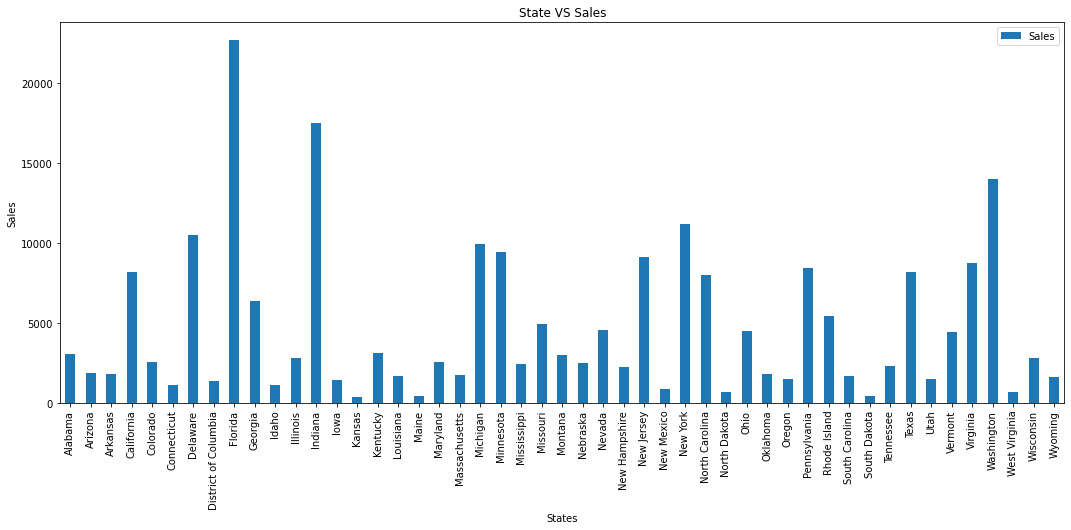

In [13]:
state_sales_df.plot(kind='bar', title='State VS Sales',
                    xlabel='States', ylabel='Sales',
                   figsize=(18,7))

### Conclusion : 
### We get the Maximum Sales from Florida and Minimum Sales from Kansas

## 3.3 What are the states with Maximum and Minimum Profits ?

In [14]:
state_profit_df = pd.pivot_table(df[['State','Profit']],
                                index='State', values='Profit',
                                aggfunc='max')
state_profit_df.sort_values(by='Profit', ascending=False)

,Profit
State,
Indiana,8399.9760
Washington,6719.9808
Delaware,5039.9856
Michigan,4946.3700
Minnesota,4630.4755
New York,3919.9888
Georgia,3177.4750
Virginia,2799.9840
Rhode Island,2591.9568


<AxesSubplot:title={'center':'State VS Profit'}, xlabel='States', ylabel='Profit'>

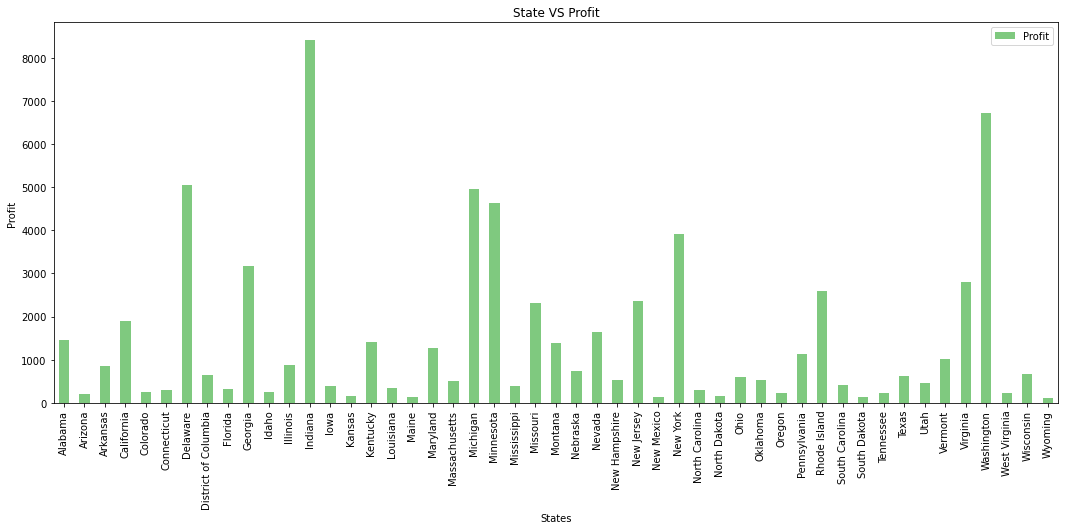

In [15]:
state_profit_df.plot(kind='bar', title='State VS Profit',
                    xlabel='States', ylabel='Profit',colormap='Accent',
                    figsize=(18,7))

### Conclusion : 
### We get the Maximum Profits from Indiana and Minimum Profits from Wyoming

## 3.4 Which Products are selling the most ?

In [16]:
df_category_sales = pd.pivot_table(df[['Category','Sub-Category','Sales']],
                                  index=['Category','Sub-Category'], 
                                   values=['Sales'],
                                  aggfunc='max')
df_category_sales

Sales
Category        Sub-Category           
Furniture       Bookcases      4404.900
                Chairs         4416.174
                Furnishings    1336.440
                Tables         4297.644
Office Supplies Appliances     2625.120
                Art            1113.024
                Binders        9892.740
                Envelopes       604.656
                Fasteners        93.360
                Labels          786.480
                Paper           733.950
                Storage        2934.330
                Supplies       8187.650
Technology      Accessories    3347.370
                Copiers       17499.950
                Machines      22638.480
                Phones         4548.810

### 3.4.1 Category VS Sales

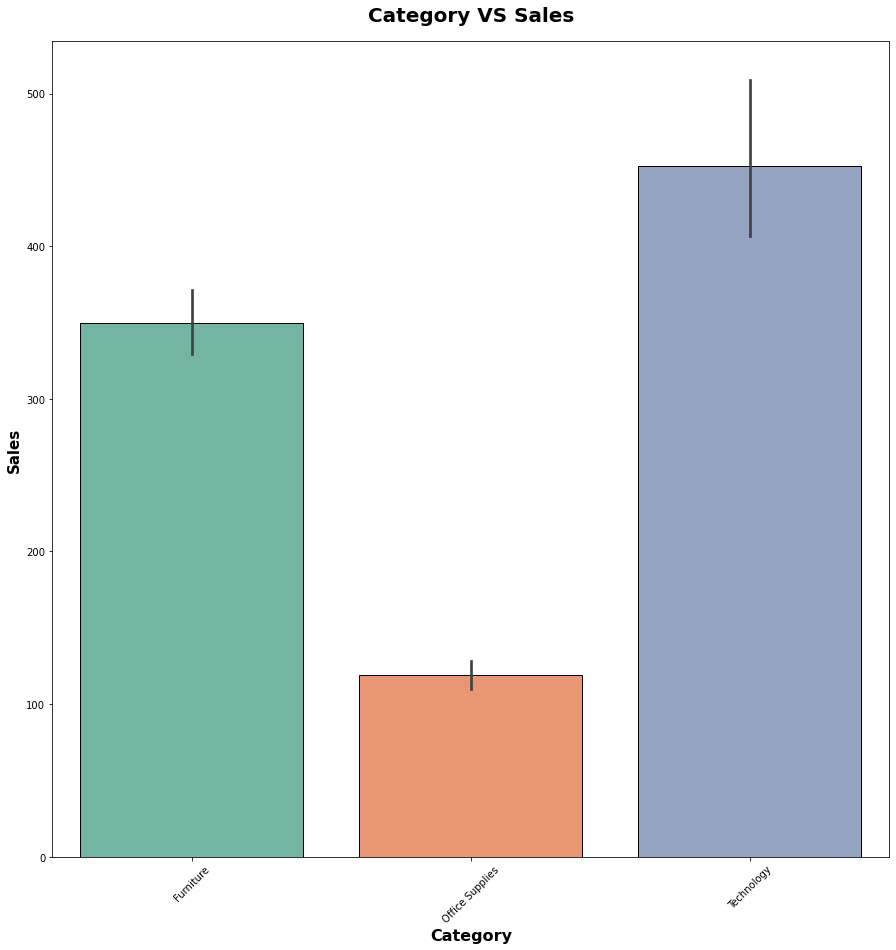

In [17]:
plt.figure(figsize=(15,15))
sns.barplot(x=df['Category'], y=df['Sales'], ec='k', palette='Set2')
plt.title("Category VS Sales", weight='bold', fontsize=20, pad=20)
plt.ylabel("Sales", weight="bold", fontsize=15)
plt.xlabel("Category", weight="bold", fontsize=16)
plt.xticks(rotation=45)
plt.show()

### 3.4.2 Sub-Category VS Sales

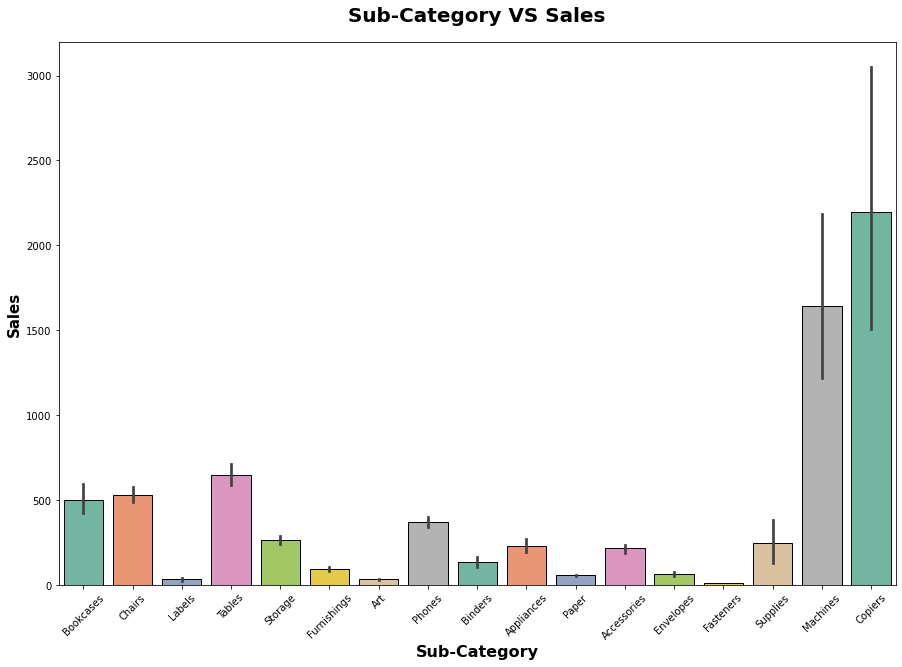

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Sub-Category'], y=df['Sales'], ec='k', palette='Set2')
plt.title("Sub-Category VS Sales", weight='bold', fontsize=20, pad=20)
plt.ylabel("Sales", weight="bold", fontsize=15)
plt.xlabel("Sub-Category", weight="bold", fontsize=16)
plt.xticks(rotation=45)
plt.show()

### 3.4.3 Category+Sub-Category VS Sales

<AxesSubplot:title={'center':'Category VS Sales'}, xlabel='Catgrgories', ylabel='Sales'>

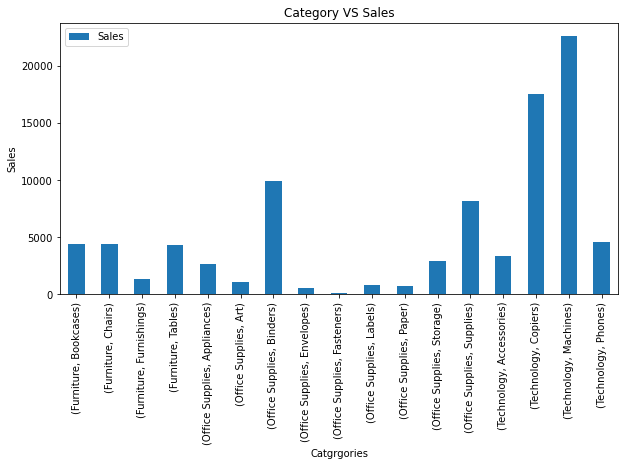

In [19]:
df_category_sales.plot(kind='bar', title='Category VS Sales',
                      xlabel='Catgrgories', ylabel='Sales',
                      figsize=(10,5))

### Conclusion : 
### Machines and Copiers from Technology category are TOP 2 in sales  

## 3.5 Which products are purchased in more quantity ?

In [20]:
products_purchase_df = pd.pivot_table(df[['Category','Sub-Category','Quantity']],
                                     index=['Category','Sub-Category'],
                                     values='Quantity',
                                     aggfunc='sum')
products_purchase_df

Quantity
Category        Sub-Category          
Furniture       Bookcases          868
                Chairs            2356
                Furnishings       3563
                Tables            1241
Office Supplies Appliances        1729
                Art               3000
                Binders           5974
                Envelopes          906
                Fasteners          914
                Labels            1400
                Paper             5178
                Storage           3158
                Supplies           647
Technology      Accessories       2976
                Copiers            234
                Machines           440
                Phones            3289

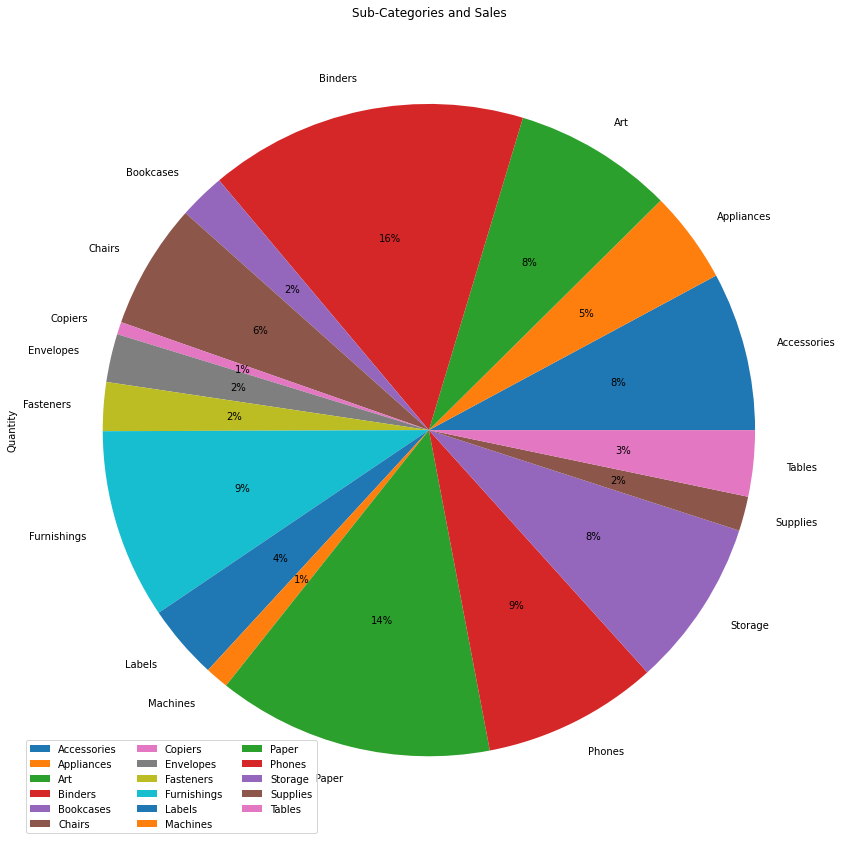

In [105]:
df.groupby(['Sub-Category']).sum().plot(kind='pie', y='Quantity', autopct='%1.0f%%',figsize=(15,15),title='Sub-Categories and Sales').legend(loc=3,ncol=3)

### 3.5.1 Products VS Quantity

<AxesSubplot:title={'center':'Product VS Quantity'}, xlabel='Products', ylabel='Quantity'>

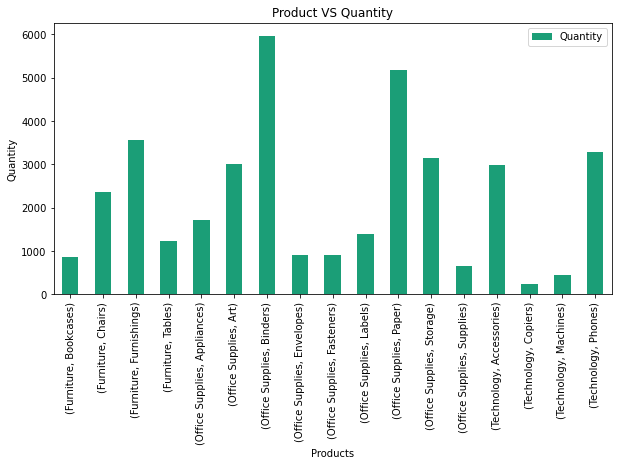

In [21]:
products_purchase_df.plot(kind='bar',title='Product VS Quantity',
                         xlabel='Products', ylabel='Quantity',
                          colormap='Dark2',
                         figsize=(10,5))

### Conclusion : 
### Binders from Office Supplies category are purchased the most

## 3.6 What are the products with Maximum Profits ?

In [22]:
product_profit_df = pd.pivot_table(df[['Category','Sub-Category','Profit']],
                                  index=['Category','Sub-Category'],
                                  values='Profit',
                                  aggfunc='max')
product_profit_df

Profit
Category        Sub-Category           
Furniture       Bookcases     1013.1270
                Chairs         770.3520
                Furnishings    387.5676
                Tables         629.0100
Office Supplies Appliances     793.7160
                Art            112.5740
                Binders       4946.3700
                Envelopes      204.0714
                Fasteners       21.8880
                Labels         385.3752
                Paper          352.2960
                Storage        792.2691
                Supplies       327.5060
Technology      Accessories    829.3754
                Copiers       8399.9760
                Machines      2799.9840
                Phones        1228.1787

### 3.6.1 Products VS Profits

<AxesSubplot:title={'center':'Products VS Profit'}, xlabel='Category', ylabel='Profit'>

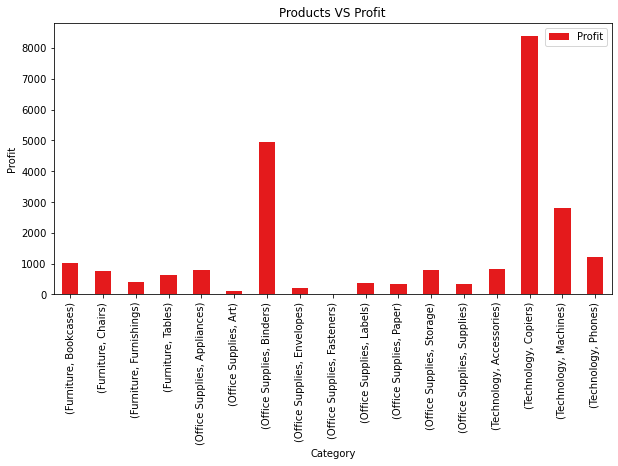

In [23]:
product_profit_df.plot(kind='bar', title='Products VS Profit',
                       ylabel='Profit',xlabel='Category',
                       cmap='Set1',
                       figsize=(10, 5))

### Conclusion : 
### Copiers from Technology category got the most profit.

# 4. Analysing the Data

## 4.1 Univariate Analysis
* The term univariate analysis refers to the analysis of one variable, prefix "uni" means "one".The purpose of univariate analysis is to understand the distribution of the values for a single variable.

### 4.1.1 Numerical Features

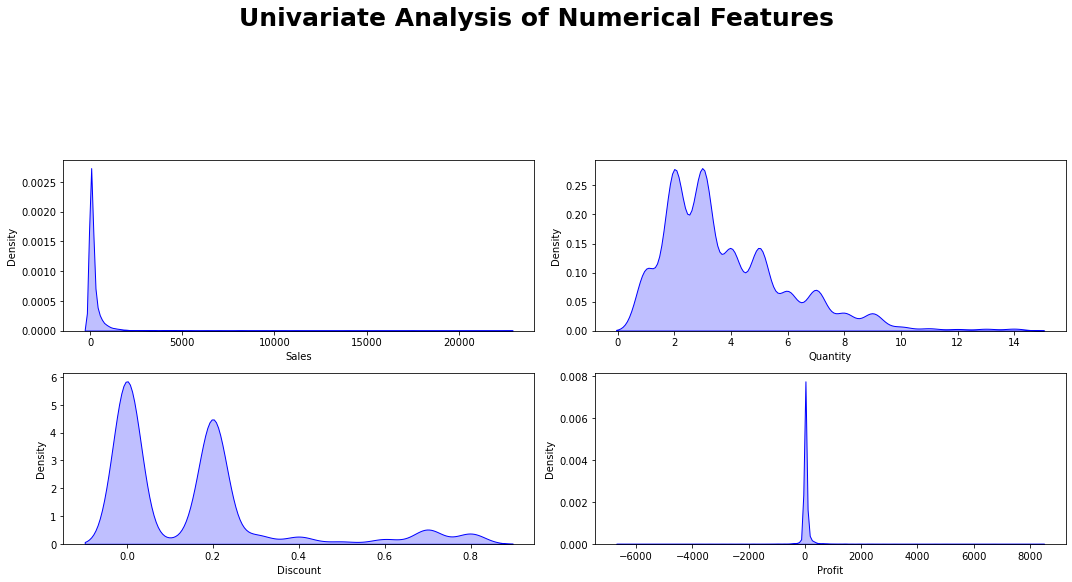

In [24]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=25,
            fontweight='bold', y=1.1)

for i in range(0, len(numeric_features)):
    plt.subplot(5,2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### 4.1.2 Categorical Features

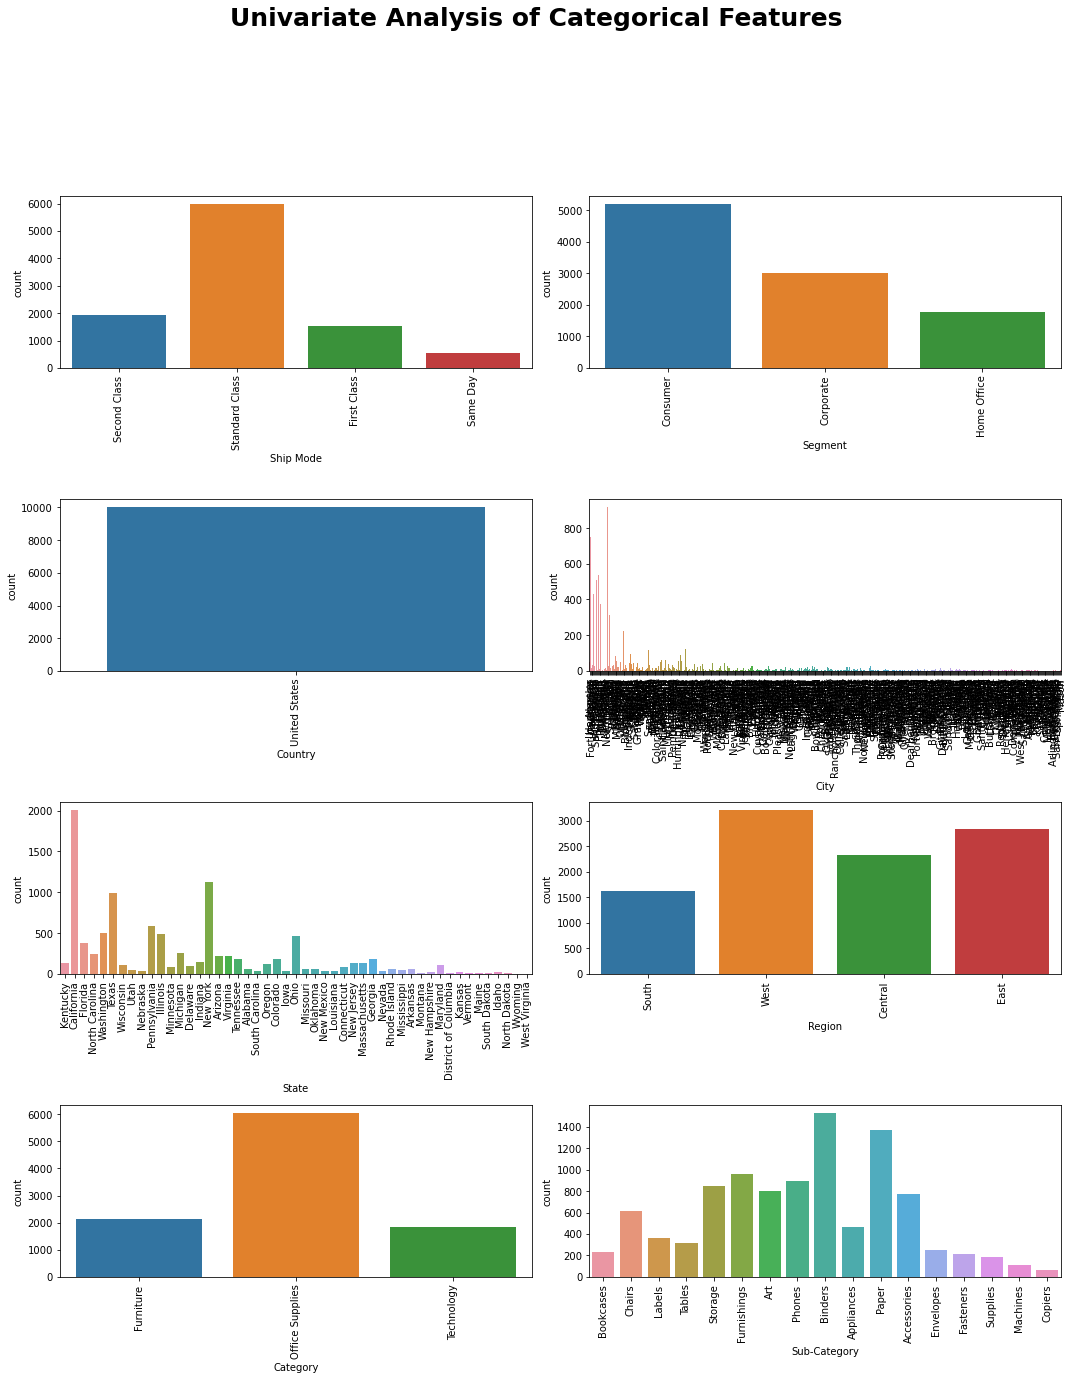

In [25]:
plt.figure(figsize=(15,20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=25,
            fontweight='bold', y=1.1)

for i in range(0, len(categorical_features)):
    plt.subplot(5,2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

## 4.2 Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable

### 4.2.1 Checking the Correlation between Numerical Features

In [26]:
df[(list(df.columns)[1:])].corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


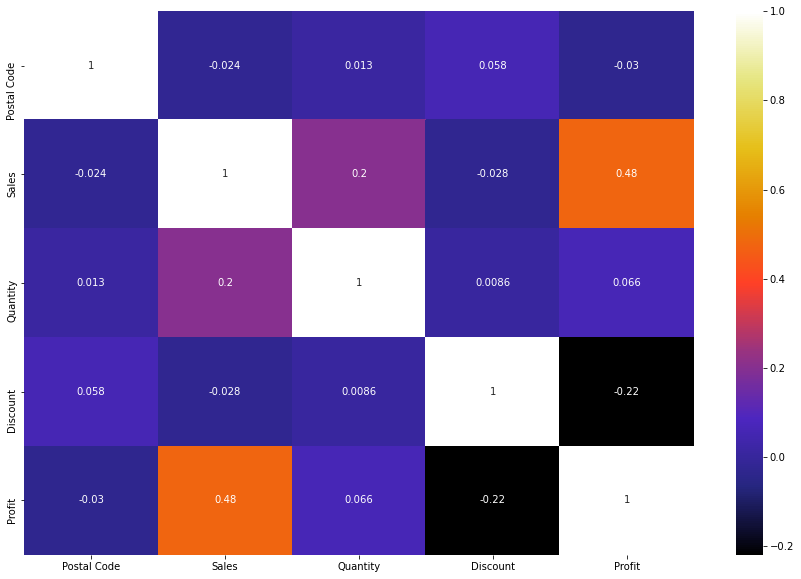

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="CMRmap",  annot=True)
plt.show()

### Conclusion:
### We cannot see any distinct correlation between any of the Numerical features

# 5. Final Conclusion: 

1. Most of the customers prefer to choose Standard mode for shipping while 
   
   Compared to other modes.

2. From Florida we got maximum sales and least from Kansas.

3. From Indiana we got maximum profit and least from Wyoming.

4. Technology category has the highest Sales & Machines from Technology category are selling the most.

5. Binders from Office Suppliers category are purchased in more quantity.

6. By selling Copiers from Technology category we got the maximum profit.

7. We can see that the Sales & Quantity graphs are Right Sweked.

8. Consumer orders are the most in numbers.

9. Most Orders came from California State and West Region.

10. We cannot see any distinct / strong correlation between any of the Numerical Variables.